# PyTorch构建 Faster RCNN

Faster R-CNN是首次完全采用Deep Learning的学习框架之一。Faster R-CNN是基于Fast RCNN的思路，然而Fast RCNN却继承自RCNN，SPP-Net的思路（译者注：此处理清楚先后关系）。虽然我们在构建Faster RCNN框架时引入了一些Fast RCNN的思想，但是我们不会详细讨论这些框架。其中一个原因是，Faster R-CNN表现得非常好，它没有使用传统的计算机视觉技术，如选择性搜索等。在非常高的层次上，Fast RCNN和Faster RCNN的工作原理如下面的流程图所示。

![avatar](./data/tu1.png)


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
# pip install -U matplotlib
import torch
# pip install pytorch
import torchvision.transforms as T
import torchvision
# pip install torchvision
import numpy as np
import cv2

import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

### 下载已经训练好的模型

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [4]:
def get_prediction(img_path, threshold):
    img = Image.open(img_path).convert('RGB')

    # 转换一个PIL库的图片或者numpy的数组为tensor张量类型；转换从[0,255]->[0,1]
    transform = T.Compose([T.ToTensor()])
    img = transform(img)

    pred = model([img])
    print(pred[0]['labels'].numpy())
    # 类别提取
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    # 坐标提取
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]

    # 找出符合相似度要求的
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t + 1]
    pred_class = pred_class[:pred_t + 1]
    print("pred_class:", pred_class)
    print("pred_boxes:", pred_boxes)
    return pred_boxes, pred_class


In [5]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
    boxes, pred_cls = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    # 转换为RGB图像
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):

        # 根据坐标圈出目标
        cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1])),
                      color=(0, 255, 0),
                      thickness=rect_th)
        # 标注类别
        cv2.putText(img, pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])), cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0), thickness=text_th)
    plt.imshow(img)
    plt.show()


E:\anaconda3\lib\site-packages\torchvision\ops\boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


[17 18 60 65 17 18 65 18 63 17 15 67]
pred_class: ['cat', 'dog']
pred_boxes: [[(36.403522, 186.53822), (268.97726, 330.01138)], [(242.29433, 28.910751), (525.41534, 382.51767)]]


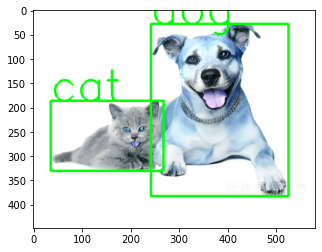

In [6]:
if __name__ == '__main__':
    object_detection_api(img_path=r"./data/tu2.jpg")

[ 1  8  1  1  1  1  1 16  1  1  1  3  1  1  1]
pred_class: ['person', 'truck', 'person']
pred_boxes: [[(581.2884, 289.82736), (795.681, 565.8435)], [(227.10843, 357.47125), (506.59528, 516.0847)], [(318.44427, 380.45987), (340.25824, 399.19296)]]


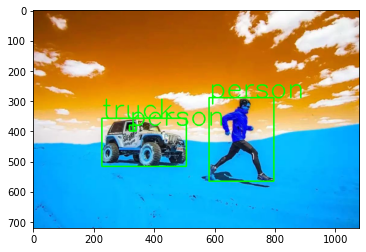

In [7]:
if __name__ == '__main__':
    object_detection_api(img_path=r"./data/tu6.jpg")